<h1 style ="font-size: 3rem;color: green;">Data Investigation Into Crime In Hackney</h1>

# Import Tools

In [3]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from scipy.stats import spearmanr

# Data Descriptive Tests

In [5]:
!ls 'Data/Deprivation_Index'

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
list(pd.read_csv('Data/Deprivation_Index/example.csv').columns)

['LSOAcode2011',
 'LSOAname2011',
 'LocalAuthorityDistrictcode2013',
 'LocalAuthorityDistrictname2013',
 'IndexofMultipleDeprivationRank',
 'IndexofMultipleDeprivationDecile',
 'IncomeRank',
 'IncomeDecile',
 'EmploymentRank',
 'EmploymentDecile',
 'EducationSkillsandTrainingRank ',
 'EducationSkillsandTrainingDecile',
 'HealthDeprivationandDisabilityRank',
 'HealthDeprivationandDisabilityDecile',
 'CrimeRank',
 'CrimeDecile ',
 'BarrierstoHousingandServicesRank ',
 'BarrierstoHousingandServicesDecile ',
 'LivingEnvironmentRank ',
 'LivingEnvironmentDecile ']

In [8]:
! tail 'Data/Deprivation_Index/example.csv'

'tail' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
pd.unique(pd.read_csv('Data/Deprivation_Index/example.csv')['LocalAuthorityDistrictname2013'])

array(['Adur', 'Allerdale', 'Amber Valley', 'Arun', 'Ashfield', 'Ashford',
       'Aylesbury Vale', 'Babergh', 'Barking and Dagenham', 'Barnet',
       'Barnsley', 'Barrow-in-Furness', 'Basildon',
       'Basingstoke and Deane', 'Bassetlaw',
       'Bath and North East Somerset', 'Bedford', 'Bexley', 'Birmingham',
       'Blaby', 'Blackburn with Darwen', 'Blackpool', 'Bolsover',
       'Bolton', 'Boston', 'Bournemouth', 'Bracknell Forest', 'Bradford',
       'Braintree', 'Breckland', 'Brent', 'Brentwood',
       'Brighton and Hove', 'Bristol, City of', 'Broadland', 'Bromley',
       'Bromsgrove', 'Broxbourne', 'Broxtowe', 'Burnley', 'Bury',
       'Calderdale', 'Cambridge', 'Camden', 'Cannock Chase', 'Canterbury',
       'Carlisle', 'Castle Point', 'Central Bedfordshire', 'Charnwood',
       'Chelmsford', 'Cheltenham', 'Cherwell', 'Cheshire East',
       'Cheshire West and Chester', 'Chesterfield', 'Chichester',
       'Chiltern', 'Chorley', 'Christchurch', 'City of London',
       'Co

In [10]:
pd.read_csv('Data/Deprivation_Index/example.csv').describe()

,IndexofMultipleDeprivationDecile,IncomeDecile,EmploymentDecile,EducationSkillsandTrainingDecile,HealthDeprivationandDisabilityDecile,CrimeDecile,BarrierstoHousingandServicesDecile,LivingEnvironmentDecile
count,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000,32844.000000
mean,5.500122,5.500122,5.500122,5.500122,5.500122,5.500122,5.500122,5.500122
std,2.872325,2.872325,2.872325,2.872325,2.872325,2.872325,2.872325,2.872325
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


##### Table 1a, aggregation for investigated dataset

I am going to try and identify whether there is a postive pattern betweeen crime and employment in hackney from the dataset

### Create dataframe to hold our data

In [11]:
example = pd.DataFrame(pd.read_csv('data/Deprivation_Index/example.csv', thousands= ',', usecols = ['LocalAuthorityDistrictname2013', 'EmploymentRank','CrimeRank',]))

Check the created dataframe

In [12]:
example.head()

,LocalAuthorityDistrictname2013,EmploymentRank,CrimeRank
0,Adur,19305,12817
1,Adur,7879,12781
2,Adur,23389,9112
3,Adur,13699,16127
4,Adur,13322,13723


###### Table 1b, head of table created to hold all district data on variables

Create table from the required dataframe data

In [13]:
hackney = example[example['LocalAuthorityDistrictname2013'] == 'Hackney']
hackney

,LocalAuthorityDistrictname2013,EmploymentRank,CrimeRank
11686,Hackney,23133,10432
11687,Hackney,19005,8873
11688,Hackney,13309,12379
11689,Hackney,10318,22591
11690,Hackney,17097,20559
...,...,...,...
11825,Hackney,15108,17424
11826,Hackney,6390,9161
11827,Hackney,12536,16229
11828,Hackney,3178,4648


###### Table 1c, dataset to hold all data on a single area of intrest

### Brief insight into the data being used

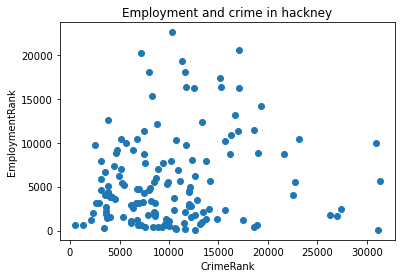

In [14]:
plt.scatter(hackney.EmploymentRank, hackney.CrimeRank)
plt.ylabel('EmploymentRank')
plt.xlabel('CrimeRank')
plt.title('Employment and crime in hackney')
plt.show()

##### Figure 1a, scatterplot of employment rank and crime rank in hackney

In [15]:
hackney.describe()

,EmploymentRank,CrimeRank
count,144.000000,144.000000
mean,10350.784722,5668.638889
std,6202.404191,5130.471946
min,530.000000,68.000000
25%,6152.250000,1697.750000
50%,9368.500000,4147.500000
75%,12692.500000,8747.750000
max,31284.000000,22591.000000


Get the spearmans r value for the between the of variable

In [16]:
scipy.stats.spearmanr(hackney['EmploymentRank'], hackney['CrimeRank'])

SpearmanrResult(correlation=0.11495458564424081, pvalue=0.1700680301535048)

group by lower income rank

In [17]:
grouped = hackney[hackney['CrimeRank'] <= 6000]
grouped.head()

,LocalAuthorityDistrictname2013,EmploymentRank,CrimeRank
11691,Hackney,2112,1202
11692,Hackney,4570,3606
11693,Hackney,3612,1870
11694,Hackney,3772,1477
11708,Hackney,11996,4423


In [18]:
grouped.describe()

,EmploymentRank,CrimeRank
count,93.000000,93.000000
mean,9851.129032,2538.709677
std,6336.413005,1735.804397
min,530.000000,68.000000
25%,5449.000000,1112.000000
50%,8571.000000,2243.000000
75%,12134.000000,3940.000000
max,31284.000000,5914.000000


The description shows an even count but a difference in mean and std

# Statistical Tests

##### Scatter Matrix

Now lets check out a scatter matrix for the grouped data

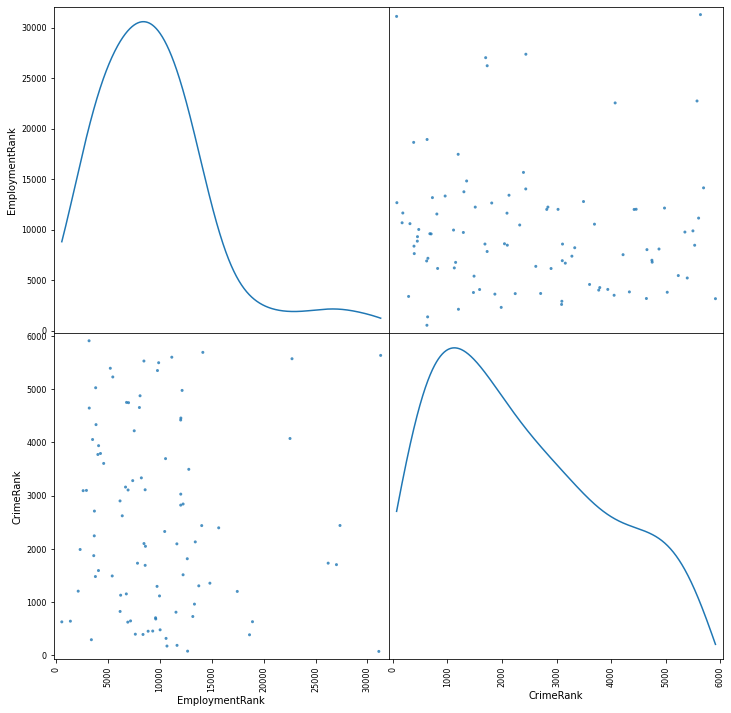

In [19]:
pd.plotting.scatter_matrix(grouped, alpha = 0.8, figsize = (12,12), diagonal ='kde')
plt.show()

##### Figure 1b, scatter matrix showing plots for grouped data

##### Pearson's r value

Now lets check out Pearson's r value

In [20]:
scipy.stats.pearsonr(grouped['EmploymentRank'],
                    grouped['CrimeRank'])

(-0.05824565766151585, 0.5791853294737527)

Now lets plot the r value

(0.0, 32821.982055919136)

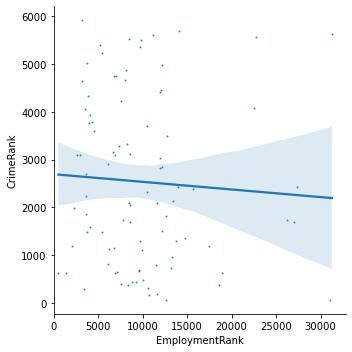

In [21]:
sns.lmplot(x="EmploymentRank", y = "CrimeRank", data = grouped,
        x_jitter = 0.3, y_jitter = 0.3, scatter_kws={'s':1})
plt.xlim(0, None)

##### Figure 1c, plot of pearson r value for the grouped data

##### Spearman's r value

now to check the spearmans r value for the grouped data

In [22]:
scipy.stats.spearmanr(grouped['EmploymentRank'], grouped['CrimeRank'])

SpearmanrResult(correlation=-0.10944167586762554, pvalue=0.29635413087585194)

##### Chi2

In [23]:
result = grouped['EmploymentRank'],grouped['CrimeRank']
chi2, p, _, _ = scipy.stats.chi2_contingency(result)
'chi2: {}, p: {}'.format(chi2, p)

'chi2: 167494.58799531602, p: 0.0'

##### Histogram

Now to plot an histogram of the groped data

<AxesSubplot:ylabel='Frequency'>

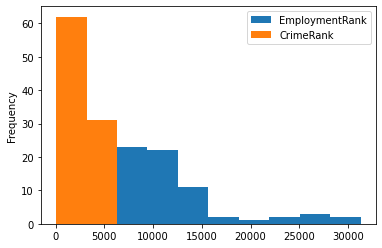

In [24]:
grouped.plot.hist()

Figure 1d, hist for hackney's grouped data